In [2]:
# Aditya Ranade
# COMM173
# Professor David Jeong
# 21 May 2023

# The code in this file will execute the steps in part 3 of the assignment for week 7. I will use comments throughout the code to explain my processes behind the code I am writing

# We will start with uploading the three files we pulled as a result of the data scraping from the 2 notebooks provided by Dr. Jeong

from google.colab import files
uploaded = files.upload()

Saving comm173_youtube.csv to comm173_youtube.csv
Saving video_comment_likes.csv to video_comment_likes.csv
Saving video_comments.csv to video_comments.csv


In [3]:
# now we will read in the three csv files and save them using pandas.
import pandas as pd

youtubeLinkScrape = pd.read_csv('comm173_youtube.csv')
videoCommentLikes = pd.read_csv('video_comment_likes.csv')
videoComments = pd.read_csv('video_comments.csv')

# now we will print all 3 along with the shape to see if there are common columns we can merge to create one clean dataframe
print(youtubeLinkScrape)
print(youtubeLinkScrape.shape)
print(videoCommentLikes)
print(videoCommentLikes.shape)
print(videoComments)
print(videoComments.shape)

                                                  link  \
0    https://www.youtube.com/watch?v=3qTZnwRbFY0&pp...   
1    https://www.youtube.com/watch?v=L_2jL8vNiNM&pp...   
2    https://www.youtube.com/watch?v=gXjcwnEpILg&pp...   
3    https://www.youtube.com/watch?v=jBFMDZ5ugd4&pp...   
4    https://www.youtube.com/watch?v=3XDcNI31T2k&pp...   
..                                                 ...   
565  https://www.youtube.com/watch?v=9214acpnJcs&pp...   
566  https://www.youtube.com/watch?v=lEAewKPzZQk&pp...   
567  https://www.youtube.com/watch?v=IZqcEk9Seew&pp...   
568  https://www.youtube.com/watch?v=_LhVDt-qG-8&pp...   
569  https://www.youtube.com/watch?v=IyWSnvgIs6s&pp...   

                                                 title  description  \
0    This Is Why Costco Only Charges $5 For A Rotis...          NaN   
1    The Big Problem Costco Shoppers Are Currently ...          NaN   
2    Don't Eat Another Costco Rotisserie Chicken Un...          NaN   
3       Removing Me

In [4]:
# after printing the 3 CSV files, we see that the first one just has all the links and the third one just has the comments.
# we are interested in the comments and the likes, so we can disregard the first and the third csv file.

print(videoCommentLikes)
print(videoCommentLikes.shape)

                                                   Link  \
0     https://www.youtube.com/watch?v=3qTZnwRbFY0&pp...   
1     https://www.youtube.com/watch?v=3qTZnwRbFY0&pp...   
2     https://www.youtube.com/watch?v=3qTZnwRbFY0&pp...   
3     https://www.youtube.com/watch?v=3qTZnwRbFY0&pp...   
4     https://www.youtube.com/watch?v=3qTZnwRbFY0&pp...   
...                                                 ...   
2661  https://www.youtube.com/watch?v=j6T4JKuDy3A&pp...   
2662  https://www.youtube.com/watch?v=j6T4JKuDy3A&pp...   
2663  https://www.youtube.com/watch?v=j6T4JKuDy3A&pp...   
2664  https://www.youtube.com/watch?v=j6T4JKuDy3A&pp...   
2665  https://www.youtube.com/watch?v=j6T4JKuDy3A&pp...   

                                                  Title  \
0     This Is Why Costco Only Charges $5 For A Rotis...   
1     This Is Why Costco Only Charges $5 For A Rotis...   
2     This Is Why Costco Only Charges $5 For A Rotis...   
3     This Is Why Costco Only Charges $5 For A Rotis...

In [5]:
# part 1 - data cleaning - lets check whether there are any null values
nullCounter = videoCommentLikes.isna().sum()
print(nullCounter)

Link          0
Title         0
Comment      10
Likes      1704
dtype: int64


In [6]:
# from this we see that there are 1704 comments that did not recieve any likes, but we still want to keep those comments
# because if we delete those, it will get rid of more than half out data obtained from the scraping method.
# instead, we will delete the rows that are null in the comment section, which results in a reduction of 10 rows from our 
# original dataset.

# we can use dropna from pandas to do this: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
videoCommentLikes = videoCommentLikes.dropna(subset = ["Comment"])

# print the dataset and run the null counter again to check that the null values have been eliminated
nullCounter = videoCommentLikes.isna().sum()
print(nullCounter)
print(videoCommentLikes)

Link          0
Title         0
Comment       0
Likes      1696
dtype: int64
                                                   Link  \
0     https://www.youtube.com/watch?v=3qTZnwRbFY0&pp...   
1     https://www.youtube.com/watch?v=3qTZnwRbFY0&pp...   
2     https://www.youtube.com/watch?v=3qTZnwRbFY0&pp...   
3     https://www.youtube.com/watch?v=3qTZnwRbFY0&pp...   
4     https://www.youtube.com/watch?v=3qTZnwRbFY0&pp...   
...                                                 ...   
2661  https://www.youtube.com/watch?v=j6T4JKuDy3A&pp...   
2662  https://www.youtube.com/watch?v=j6T4JKuDy3A&pp...   
2663  https://www.youtube.com/watch?v=j6T4JKuDy3A&pp...   
2664  https://www.youtube.com/watch?v=j6T4JKuDy3A&pp...   
2665  https://www.youtube.com/watch?v=j6T4JKuDy3A&pp...   

                                                  Title  \
0     This Is Why Costco Only Charges $5 For A Rotis...   
1     This Is Why Costco Only Charges $5 For A Rotis...   
2     This Is Why Costco Only Charges

In [7]:
# part 2 - remove stopwords

# for this we will iterate through the "Comment" column and delete all the stopwords from each of the strings stored in the comments column
# first we import the required libraries

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
# lets get the set of english stopwords from the library

stopwordsEnglish = set(nltk.corpus.stopwords.words('english'))

# now we will write a loop to iterate through each row in the comments column, tokenize each comment, and see if any of those words are stopwords. If yes, remove it.
# define the function

def removeStopwords(comment):
  # tokenize the comment
  commentWords = word_tokenize(comment)
  # ues list comprehension to filter the words in each of the comments
  filterWords = [word for word in commentWords if word.lower() not in stopwordsEnglish]
  # after the words have been filtered, join them back together in a string using the .join() method in python
  commentNoStopwords = ' '.join(filterWords)
  # return the comment without stopwords
  return commentNoStopwords

# apply the function for removing stopwords to all the comments in the column
videoCommentLikes['Comment'] = videoCommentLikes['Comment'].apply(removeStopwords)

# print the whole column again
print(videoCommentLikes['Comment'])

0                                  fan Costco chicken ? ?
1       mom went Costco rotisserie chicken came living...
2       feel like Costco played system . able provide ...
3       Costco right . planned buying $ 12 make wipes ...
4       retired regular work , getting hot , fresh chi...
                              ...                        
2661                                         hell point ?
2662                                  permission filmed ?
2663                          Red Apron super slow taking
2664    Yuckkky ! ! ! eat ....... Loaded corn syrup to...
2665                                                     
Name: Comment, Length: 2656, dtype: object


In [9]:
# now we must check if there are any null values in comment column again and remove those

nullCounter = videoCommentLikes.isna().sum()
print(nullCounter)

Link          0
Title         0
Comment       0
Likes      1696
dtype: int64


                  Likes  commentLength
Likes          1.000000       0.000917
commentLength  0.000917       1.000000


<Axes: >

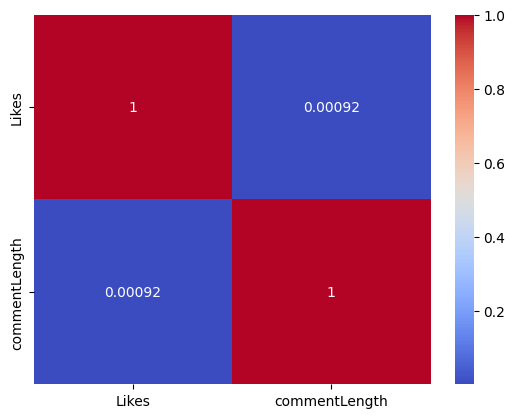

In [10]:
# there seem to be no null values in the comment section after removing stopwords so we can continue without removing any rows

# part 3 - conduct a correlation analysis
# for this we will use seaborn from python

import seaborn as sns

# as of now we only have one numerical value, so we will figure out the length of each comment and add it as a new column and see if there is a correlation between length of comment and # of likes

videoCommentLikes['commentLength'] = videoCommentLikes['Comment'].apply(lambda x: len(x))

# we also see that comment likes are stored as strings so we need to convert these. Let's define a function to do so:

def convertLikestoInt(likes):
  # check that the instance of the object is a string, and that K exists in the string
  if isinstance(likes, str) and 'K' in likes:
    # if yes, remove the K and replace with a null value and multiply by 1000
    return float(likes.replace('K', '')) * 1000
  # if not then just change string to int, and if there is any other valueerror or typeerror, return the float of that
  else:
    try:
      return int(likes)
    except (ValueError, TypeError):
      return float(likes)

# now we apply this function to the likes column
videoCommentLikes['Likes'] = videoCommentLikes['Likes'].apply(convertLikestoInt)

# compute the correlation
correlationValues = videoCommentLikes.corr(numeric_only = True)
print(correlationValues)
sns.heatmap(correlationValues, annot = True, cmap = 'coolwarm')

Based on the correlation heatmap above, we see that the number of likes versus the comment length has a very very low correlation (almost non-existent.

In [11]:
# download the vader lexicon to complete the sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

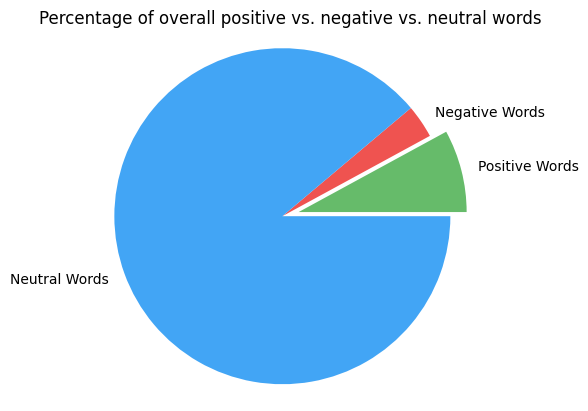

Percentage of Neutral Words:  88.86270856735801 %
Percentage of Positive Words:  7.934463957916655 %
Percentage of Negative Words:  3.202827474725335 %


In [12]:
# part 4 - sentiment analysis

# import required libraries
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# establish SIA for later use
sia = SentimentIntensityAnalyzer()

# declare lists that we will be appending words to according to their sentiment
positiveWords = []
negativeWords = []
neutralWords = []

# write a loop to parse through each of the comments
for comment in videoCommentLikes['Comment']:
  # split the comment into tokens to be parsed
  tokens = comment.split()
  # set up the loop to parse the tokens obtained from the comment
  for token in tokens:
    try:
      # compute sentiment score. And check the compound score and append token to the appropriate list. If none, word goes to neutral
      sentimentScore = sia.polarity_scores(token)
      if sentimentScore['compound'] > 0:
        positiveWords.append(token)
      elif sentimentScore['compound'] < 0:
        negativeWords.append(token)
      else:
        neutralWords.append(token)
    # catch-all statement to catch any words that are not meeting the requirement of the parser
    except KeyError:
        neutralWords.append(token)

# calculate the percentages
totalWords = len(positiveWords) + len(negativeWords) + len(neutralWords)
positiveWordPercentage = (len(positiveWords) / totalWords) * 100
negativeWordPercentage = (len(negativeWords) / totalWords) * 100
neutralWordPercentage = (len(neutralWords) / totalWords) * 100

# establish requirements for pie plot to visualize the percentages
labels = ['Positive Words', 'Negative Words', 'Neutral Words']
percentages = [positiveWordPercentage, negativeWordPercentage, neutralWordPercentage]
colors = ['#66BB6A', '#EF5350', '#42A5F5']
explode = (0.1, 0, 0)

# plot the percentages
plt.pie(percentages, explode = explode, labels = labels, colors = colors)
plt.axis('equal')
plt.title('Percentage of overall positive vs. negative vs. neutral words')
plt.show()

# print the percentages
print("Percentage of Neutral Words: ", neutralWordPercentage, "%")
print("Percentage of Positive Words: ", positiveWordPercentage, "%")
print("Percentage of Negative Words: ", negativeWordPercentage, "%")

Based on the graph above, we can see that most of the words in the comments section obtained for the search term "costco rotisserie chicken" are neutral in nature. There are fewer negative words than positive words that are in the comments section, which indicates that the topic searched is a positive topic.

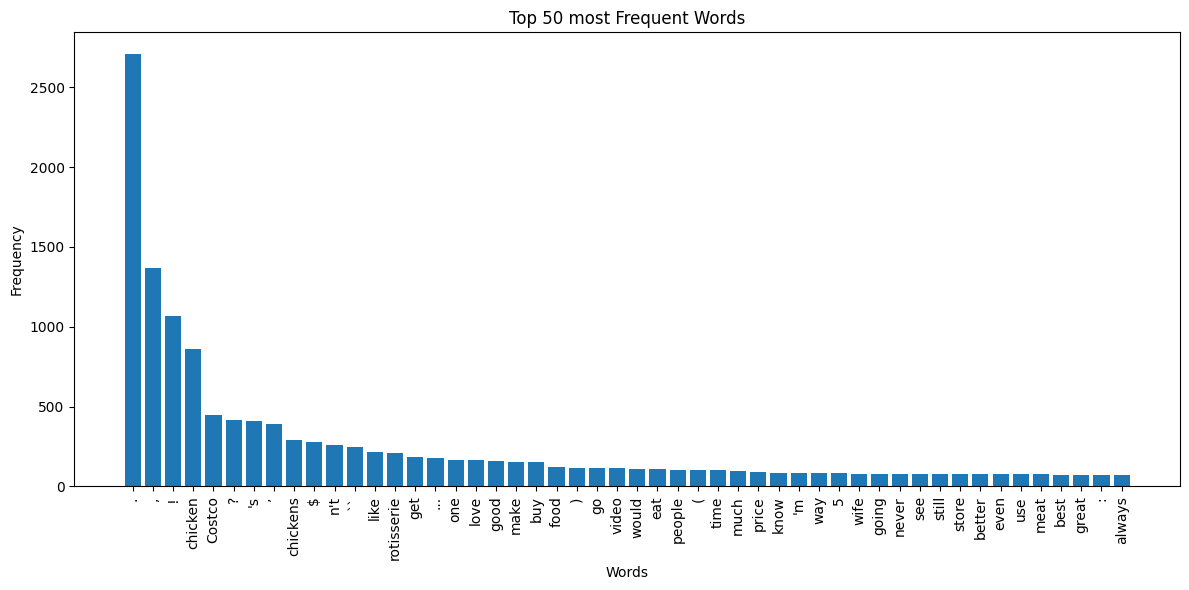

In [13]:
# part 5 - plot most frequently occurring words

# we can parse through all the comments and use a simple counter to count the words. We can store this as a python dictionary

# import the counter from the collections library. This will help us count the frequency of the words
from collections import Counter

wordCounter = Counter()
# establish the loop to loop through all the comments in the dataframe row by row
for comment in videoCommentLikes['Comment']:
  # split up the comment into tokens, and update the counter which will add the counts to each of the words, which will giet updated as the loop parses through each comment
  tokens = word_tokenize(comment)
  wordCounter.update(tokens)

# figure out top 50 words by using .most_common functionality, which takes in an int for how many top words you want
topFiftyWords = dict(wordCounter.most_common(50))

# setup the plot
plt.figure(figsize = (12, 6))
plt.bar(topFiftyWords.keys(), topFiftyWords.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 most Frequent Words')
# do the rotate so that we can see the words
plt.xticks(rotation = 90)
# to adjust the padding
plt.tight_layout()
plt.show()

What we can see through this graph is that obviously chicken and Costco are the most frequently occurring words. However, we also do see that there are several punctuations that are also included in this bar chart. That is because when we cleaned the comments for stopwords, we did not clean them for punctuation too, so those automatically become tokens that are counted as words. If we ignore that, we see that in addition to those 2 words, chickens, like, and rotisserie are also very frequently occurring words.

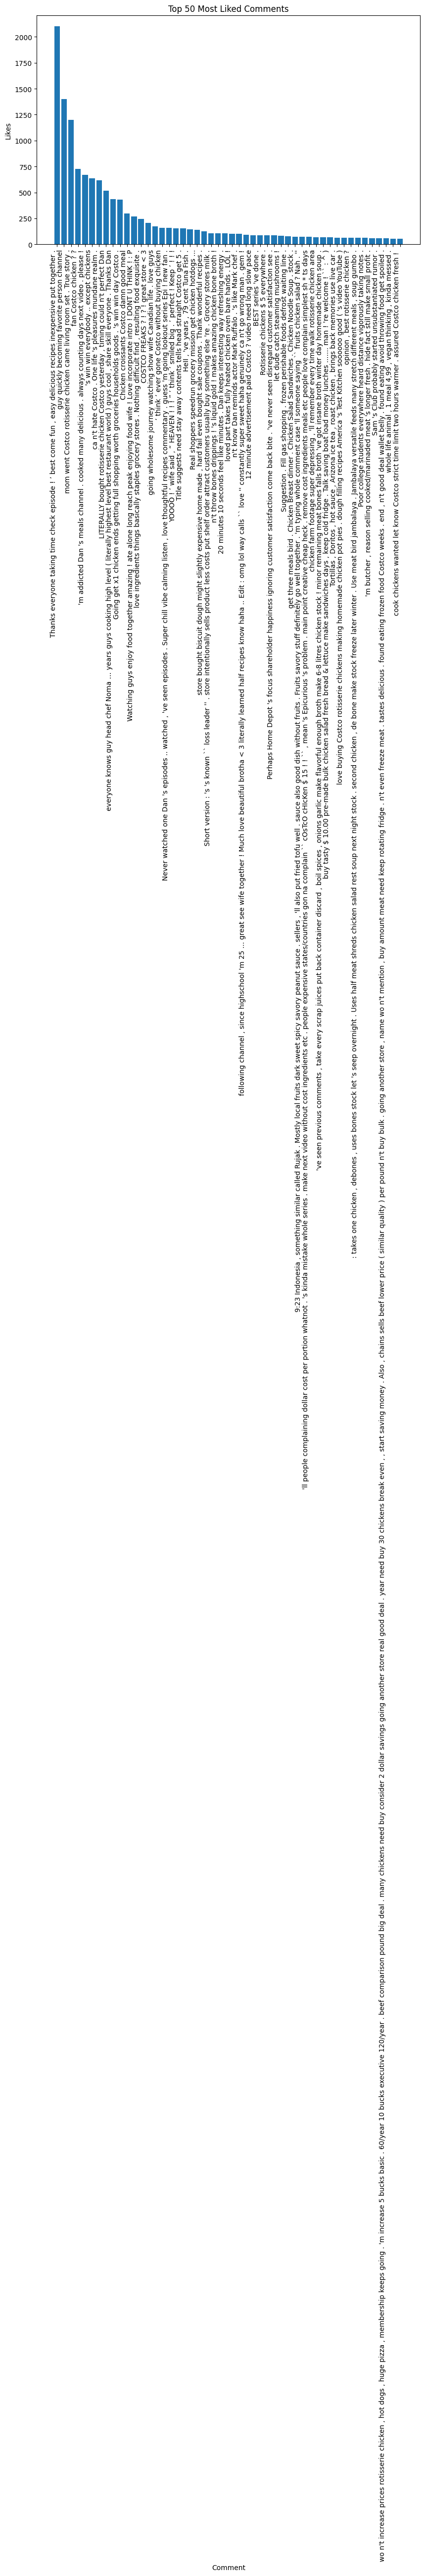

In [19]:
# part 6 - plot top liked comments

# since we have already converted the like values to ints/floats, we can sort using .sort_values functionality in dataframes

# for this, we sort by likes in descending order, that means most liked comments will be at the top
videoCommentLikes_sorted = videoCommentLikes.sort_values(by = "Likes", ascending = False)
# get the top 50 rows from the sorted dataframe
top50likedComments = videoCommentLikes_sorted.head(50)

# establish the bar graph
plt.figure(figsize = (10, 6))
plt.bar(top50likedComments['Comment'], top50likedComments['Likes'])
plt.xlabel('Comment')
plt.ylabel('Likes')
plt.title('Top 50 Most Liked Comments')
plt.xticks(rotation = 90, ha = 'right')
plt.show()